<h3 align=center> In His Name, the Most High </h3>

In [1]:
#importing libraries
import re
import matplotlib.pyplot as plt
plt.style.use('seaborn') # beautiful plots :O

## ATIS Dataset EDA

The ATIS dataset is a standard benchmark dataset widely used for intent classification and slot filling.
here we obtained the dataset from https://github.com/yvchen/JointSLU.

In [2]:
#importing train data

train_words = list() # a list of list of words for every sentence in train dataset
train_tags = list() # a list of list of IOB tags for every sentence in train dataset
train_intents = list() # a list of intent for every sentence in train dataset
train_data = list() # a list of dicts contaiting above data in a more structured form
train_vocabs = set() # a set containing whole train dataset words

with open('atis-2.train+dev.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): 
                # what to do if not word.isalpha()??
                # word = re.sub(r'[^\w\s]', '', word) # removing punctuations
                word = word.lower() # lowerizing word
                words.append(word) 
                train_vocabs.add(word)
        
        tags = list()
        for tag in line[index + 2:-1]:
            tags.append(tag)
                    
        # handling entries with multiple intents
        intent = ""
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                intent = item
                break
        else: intent = line[-1]

        if (intent != 'atis_cheapest'): #droping 'atis_cheapest' because it has only 1 sample!
          train_words.append(words)
          train_tags.append(tags)
          train_intents.append(intent)
          train_data.append({
              'words': words,
              'iob_tags': tags,
              #             'length': len(words),
              'intent': intent})

print('train dataset vocab size:', len(train_vocabs))
print('# of train dataset rows:', len(train_data))
print('# of train dataset unique intents:', len(set(train_intents)))
print('# of train dataset unique IOB tags:', len(set([tag for item in train_tags for tag in item])))

train dataset vocab size: 898
# of train dataset rows: 4977
# of train dataset unique intents: 16
# of train dataset unique IOB tags: 121


In [3]:
ind = 0
train_data[ind]

{'intent': 'atis_flight',
 'iob_tags': ['O',
  'O',
  'O',
  'O',
  'O',
  'B-fromloc.city_name',
  'O',
  'B-toloc.city_name',
  'B-round_trip',
  'I-round_trip'],
 'words': ['i',
  'want',
  'to',
  'fly',
  'from',
  'baltimore',
  'to',
  'dallas',
  'round',
  'trip']}

In [4]:
print('tokenized words:', train_data[ind]['words'])
print('IOB tags:', train_data[ind]['iob_tags'])
print('intent:', train_data[ind]['intent'])

tokenized words: ['i', 'want', 'to', 'fly', 'from', 'baltimore', 'to', 'dallas', 'round', 'trip']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'B-round_trip', 'I-round_trip']
intent: atis_flight


In [5]:
train_intents_freq = dict()
for intent in set(train_intents):
    train_intents_freq[intent] = train_intents.count(intent)
    
for key in train_intents_freq:
    value = train_intents_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(train_intents) * 100))

atis_abbreviation: 147 (2.95%),
atis_flight_time: 54 (1.08%),
atis_restriction: 6 (0.12%),
atis_city: 19 (0.38%),
atis_meal: 6 (0.12%),
atis_aircraft: 82 (1.65%),
atis_ground_service: 256 (5.14%),
atis_ground_fare: 18 (0.36%),
atis_flight: 3687 (74.08%),
atis_distance: 20 (0.40%),
atis_airfare: 424 (8.52%),
atis_airport: 20 (0.40%),
atis_flight_no: 12 (0.24%),
atis_airline: 159 (3.19%),
atis_quantity: 51 (1.02%),
atis_capacity: 16 (0.32%),


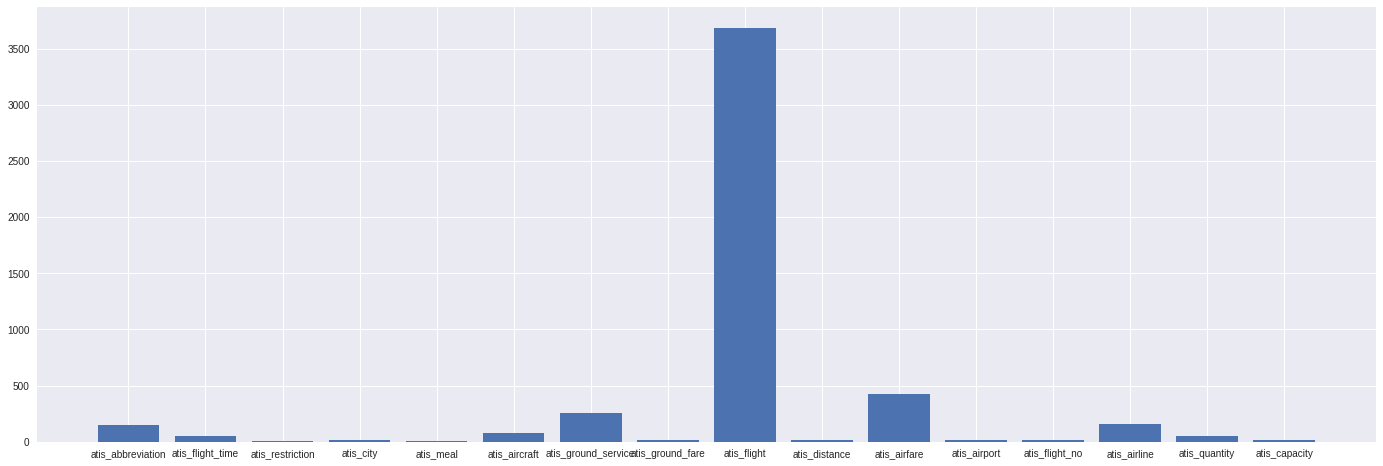

In [6]:
plt.figure(figsize=(24, 8))
plt.bar(list(train_intents_freq.keys()),train_intents_freq.values())
plt.show()

In [7]:
train_tags_freq = dict()
count = 0
for item in train_tags:
    for tag in item:
        if (tag in train_tags_freq): train_tags_freq[tag] += 1 #item.count(tag)
        else: train_tags_freq[tag] = 1 #item.count(tag)
        count += 1

for key in train_tags_freq:
    value = train_tags_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / count * 100))

O: 35662 (63.46%),
B-fromloc.city_name: 4326 (7.70%),
B-toloc.city_name: 4343 (7.73%),
B-round_trip: 348 (0.62%),
I-round_trip: 339 (0.60%),
B-cost_relative: 343 (0.61%),
B-fare_amount: 53 (0.09%),
I-fare_amount: 51 (0.09%),
B-arrive_date.month_name: 47 (0.08%),
B-arrive_date.day_number: 47 (0.08%),
I-fromloc.city_name: 691 (1.23%),
B-stoploc.city_name: 239 (0.43%),
B-arrive_time.time_relative: 187 (0.33%),
B-arrive_time.time: 208 (0.37%),
I-arrive_time.time: 161 (0.29%),
B-toloc.state_code: 86 (0.15%),
I-toloc.city_name: 1099 (1.96%),
I-stoploc.city_name: 47 (0.08%),
B-meal_description: 57 (0.10%),
B-depart_date.month_name: 379 (0.67%),
B-depart_date.day_number: 395 (0.70%),
B-airline_name: 701 (1.25%),
I-airline_name: 421 (0.75%),
B-depart_time.period_of_day: 593 (1.06%),
B-depart_date.day_name: 889 (1.58%),
B-toloc.state_name: 77 (0.14%),
B-depart_time.time_relative: 323 (0.57%),
B-depart_time.time: 369 (0.66%),
B-toloc.airport_name: 39 (0.07%),
I-toloc.airport_name: 49 (0.09%),
B-d

In [8]:
#importing test data

test_words = list()  # a list of list of words for every sentence in test dataset
test_tags = list() # a list of list of IOB tags for every sentence in test dataset
test_intents = list() # a list of intent for every sentence in test dataset
test_vocabs = set() # a list of dicts contaiting above data in a more structured form
test_data = list() # a set containing whole test dataset words

with open('atis.test.w-intent.iob') as f:
    for line in f.readlines():
        line = line.strip().split()
        
        index = 0
        words = list()
        for i, word in enumerate(line[:-1]):
            if (word == 'EOS'):
                index = i
                break
            if (word != 'BOS'): 
                word = re.sub(r'[^\w\s]', '', word.lower()) # removing punctuations & lowerizing word
                words.append(word) 
                train_vocabs.add(word)
        test_words.append(words)
        
        tags = list()
        for tag in line[index + 2:-1]:
            tags.append(tag)
        test_tags.append(tags)
                    
        #handling entries with multiple intents
        intent = ""
        if ('#' in line[-1]): 
            for item in line[-1].split('#'):
                intent = item
                break
        else: intent = line[-1]
        test_intents.append(intent)
        
        test_data.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})

print('train dataset vocab size:', len(test_vocabs))
print('# of test dataset rows:', len(test_data))
print('# of test dataset unique intents:', len(set(test_intents)))
print('# of test dataset unique IOB tags:', len(set([tag for item in test_tags for tag in item])))

train dataset vocab size: 0
# of test dataset rows: 893
# of test dataset unique intents: 16
# of test dataset unique IOB tags: 101


In [9]:
ind = 0
print('tokenized words:', test_data[ind]['words'])
print('IOB tags:', test_data[ind]['iob_tags'])
print('intent:', test_data[ind]['intent'])

tokenized words: ['i', 'would', 'like', 'to', 'find', 'a', 'flight', 'from', 'charlotte', 'to', 'las', 'vegas', 'that', 'makes', 'a', 'stop', 'in', 'st', 'louis']
IOB tags: ['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-fromloc.city_name', 'O', 'B-toloc.city_name', 'I-toloc.city_name', 'O', 'O', 'O', 'O', 'O', 'B-stoploc.city_name', 'I-stoploc.city_name']
intent: atis_flight


In [10]:
test_intents_freq = dict()
for intent in set(test_intents):
    test_intents_freq[intent] = test_intents.count(intent)
    
for key in test_intents_freq:
    value = test_intents_freq[key]
    print('%s: %d (%.2f%%) ,' % (key, value, value / len(test_intents) * 100))

atis_abbreviation: 33 (3.70%) ,
atis_flight_time: 1 (0.11%) ,
atis_meal: 6 (0.67%) ,
atis_city: 6 (0.67%) ,
atis_aircraft: 9 (1.01%) ,
atis_ground_service: 36 (4.03%) ,
atis_ground_fare: 7 (0.78%) ,
atis_distance: 10 (1.12%) ,
atis_airfare: 49 (5.49%) ,
atis_airport: 18 (2.02%) ,
atis_day_name: 2 (0.22%) ,
atis_quantity: 3 (0.34%) ,
atis_flight_no: 9 (1.01%) ,
atis_airline: 38 (4.26%) ,
atis_flight: 645 (72.23%) ,
atis_capacity: 21 (2.35%) ,


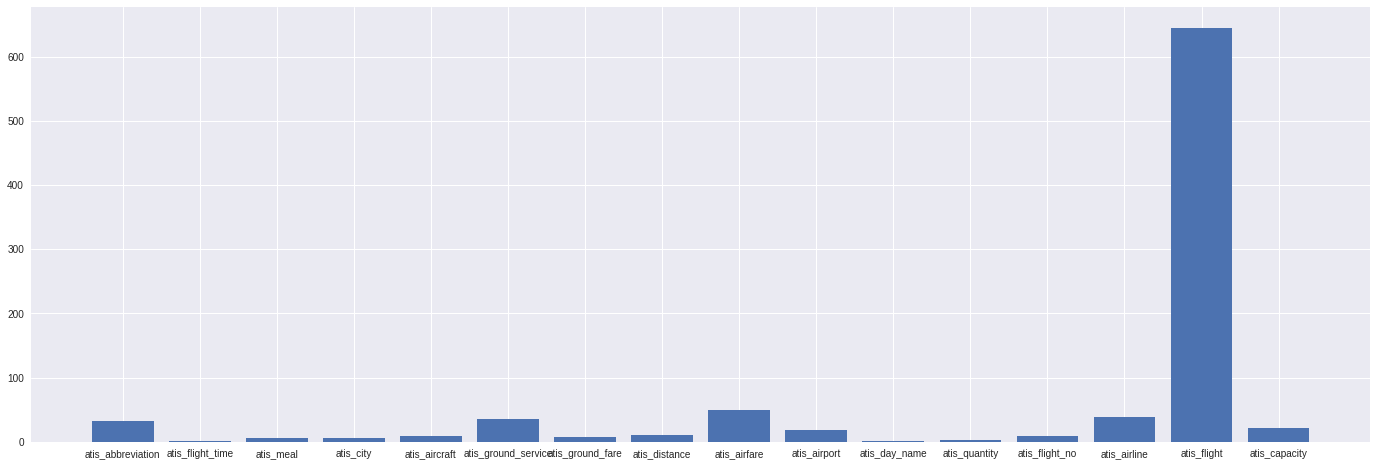

In [11]:
plt.figure(figsize=(24, 8))
plt.bar(list(test_intents_freq.keys()),test_intents_freq.values())
plt.show()

In [12]:
test_tags_freq = dict()
count = 0
for item in test_tags:
    for tag in item:
        if (tag in test_tags_freq): test_tags_freq[tag] += 1 #item.count(tag)
        else: test_tags_freq[tag] = 1 #item.count(tag)
        count += 1

for key in test_tags_freq:
    value = test_tags_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / count * 100))

O: 5501 (60.03%),
B-fromloc.city_name: 704 (7.68%),
B-toloc.city_name: 716 (7.81%),
I-toloc.city_name: 265 (2.89%),
B-stoploc.city_name: 20 (0.22%),
I-stoploc.city_name: 10 (0.11%),
B-depart_date.month_name: 56 (0.61%),
B-depart_date.day_number: 55 (0.60%),
B-depart_time.time_relative: 65 (0.71%),
B-depart_time.time: 57 (0.62%),
I-depart_time.time: 52 (0.57%),
B-round_trip: 73 (0.80%),
I-round_trip: 71 (0.77%),
B-airline_name: 101 (1.10%),
I-airline_name: 65 (0.71%),
B-depart_date.day_name: 212 (2.31%),
B-depart_time.period_of_day: 130 (1.42%),
I-fromloc.city_name: 177 (1.93%),
B-meal_description: 10 (0.11%),
B-depart_date.date_relative: 17 (0.19%),
B-arrive_time.time_relative: 31 (0.34%),
B-arrive_time.time: 34 (0.37%),
I-arrive_time.time: 35 (0.38%),
B-return_date.day_name: 2 (0.02%),
B-arrive_date.date_relative: 2 (0.02%),
B-arrive_date.day_name: 11 (0.12%),
B-flight_stop: 21 (0.23%),
B-depart_date.today_relative: 9 (0.10%),
B-toloc.state_name: 28 (0.31%),
B-arrive_date.month_name: 

##### comparing train & test dataset tags & intents:

In [13]:
print(test_vocabs.difference(train_vocabs))

set()


In [14]:
set(test_intents).difference(set(train_intents))

{'atis_day_name'}

so from above, we see there is no train data for 'atis_day_name'...

In [15]:
set(train_intents).difference(set(test_intents))

{'atis_restriction'}

and also there are no test data for 'atis_cheapest' & 'atis_restriction'...

In [16]:
set(test_tags_freq.keys()).difference(set(train_tags_freq.keys()))

{'B-booking_class',
 'B-compartment',
 'B-flight',
 'B-stoploc.airport_code',
 'I-flight_number',
 'I-state_name'}

also we see there are no train data with 'B-stoploc.airport_code' or 'B-booking_class' or 'I-flight_number' or 'I-state_name' or 'B-flight' or 'B-compartment' tag...

In [17]:
set(train_tags_freq.keys()).difference(set(test_tags_freq.keys()))

{'B-arrive_date.today_relative',
 'B-arrive_time.period_mod',
 'B-day_number',
 'B-month_name',
 'B-return_date.day_number',
 'B-return_date.month_name',
 'B-return_date.today_relative',
 'B-return_time.period_mod',
 'B-return_time.period_of_day',
 'B-stoploc.airport_name',
 'B-stoploc.state_code',
 'B-time',
 'B-time_relative',
 'B-today_relative',
 'I-arrive_date.day_number',
 'I-arrive_time.period_of_day',
 'I-depart_date.today_relative',
 'I-economy',
 'I-fare_basis_code',
 'I-flight_stop',
 'I-meal_code',
 'I-meal_description',
 'I-return_date.day_number',
 'I-return_date.today_relative',
 'I-time',
 'I-today_relative'}

and finally there are no train data with 'I-return_date.day_number' or 'B-return_time.period_mod' or ... tag.

to handle imbalanced data first we try to find and remove duplicates:

In [18]:
#removing duplicate train data with 'atis_flight' intent

train_words_dup_free = list()
train_tags_dup_free = list()
train_intents_dup_free = list()
train_data_dup_free = list()
for i in range(len(train_words)):
    words = train_words[i]
    tags = train_tags[i]
    intent = train_intents[i]
    if (intent != 'atis_flight' or (intent == 'atis_flight' and words not in train_words_dup_free)):
        train_words_dup_free.append(words)
        train_tags_dup_free.append(tags)
        train_intents_dup_free.append(intent)
        train_data_dup_free.append({
            'words': words,
            'iob_tags': tags,
            #             'length': len(words),
            'intent': intent})

print('# of duplicate sentences in train data: %d - %d = %d' % (len(train_words), len(train_words_dup_free), len(train_words) - len(train_words_dup_free)))

# of duplicate sentences in train data: 4977 - 4733 = 244


In [19]:
train_intents_dup_free_freq = dict()
for intent in train_intents_dup_free:
    train_intents_dup_free_freq[intent] = train_intents_dup_free.count(intent)

for key in train_intents_dup_free_freq:
    value = train_intents_dup_free_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(train_intents_dup_free) * 100))

atis_flight: 3443 (72.74%),
atis_airfare: 424 (8.96%),
atis_airline: 159 (3.36%),
atis_ground_service: 256 (5.41%),
atis_quantity: 51 (1.08%),
atis_city: 19 (0.40%),
atis_abbreviation: 147 (3.11%),
atis_aircraft: 82 (1.73%),
atis_distance: 20 (0.42%),
atis_ground_fare: 18 (0.38%),
atis_capacity: 16 (0.34%),
atis_flight_time: 54 (1.14%),
atis_meal: 6 (0.13%),
atis_flight_no: 12 (0.25%),
atis_restriction: 6 (0.13%),
atis_airport: 20 (0.42%),


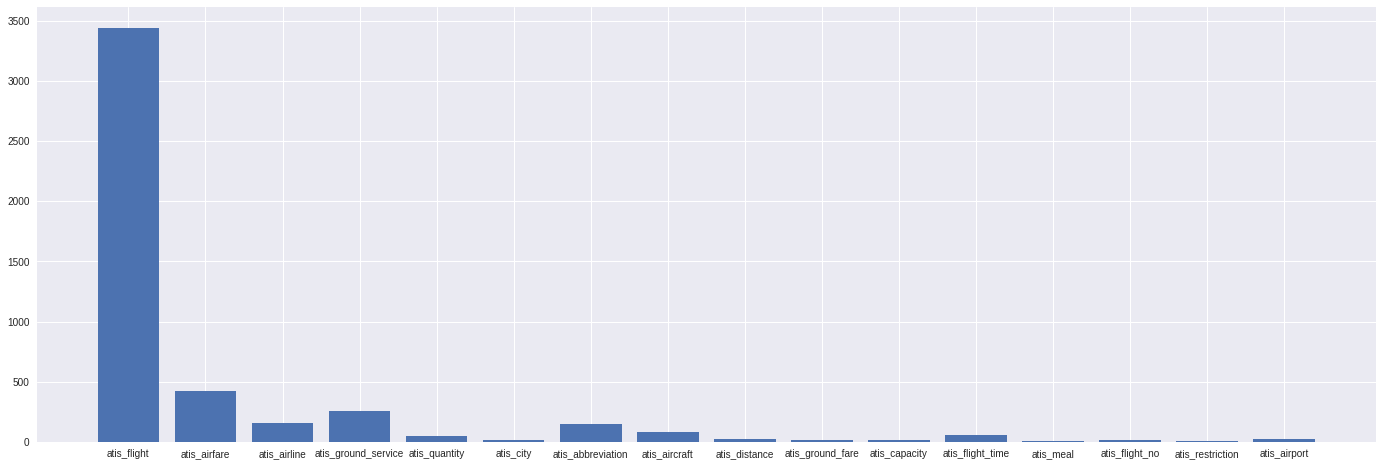

In [20]:
plt.figure(figsize=(24, 8))
plt.bar(list(train_intents_dup_free_freq.keys()),train_intents_dup_free_freq.values())
plt.show()

In [21]:
##removing duplicate test data with 'atis_flight' intent

test_words_dup_free = list()
test_tags_dup_free = list()
test_intents_dup_free = list()
test_data_dup_free = list()
for i in range(len(test_words)):
    words = test_words[i]
    tags = test_tags[i]
    intent = test_intents[i]
    if (intent != 'atis_flight' or (intent == 'atis_flight' and words not in test_words_dup_free)):
        test_words_dup_free.append(words)
        test_tags_dup_free.append(tags)
        test_intents_dup_free.append(intent)
        test_data.append({
            'words': words,
            'iob_tags': tags,
#             'length': len(words),
            'intent': intent})


print('# of duplicate sentences in test data: %d - %d = %d' % (len(test_words), len(test_words_dup_free),  len(test_words) - len(test_words_dup_free)))

# of duplicate sentences in test data: 893 - 874 = 19


In [22]:
test_intents_dup_free_freq = dict()
for intent in set(test_intents_dup_free):
    test_intents_dup_free_freq[intent] = test_intents_dup_free.count(intent)

for key in test_intents_dup_free_freq:
    value = test_intents_dup_free_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(test_intents_dup_free) * 100))

atis_abbreviation: 33 (3.78%),
atis_flight_time: 1 (0.11%),
atis_meal: 6 (0.69%),
atis_city: 6 (0.69%),
atis_aircraft: 9 (1.03%),
atis_ground_service: 36 (4.12%),
atis_ground_fare: 7 (0.80%),
atis_distance: 10 (1.14%),
atis_airfare: 49 (5.61%),
atis_airport: 18 (2.06%),
atis_day_name: 2 (0.23%),
atis_quantity: 3 (0.34%),
atis_flight_no: 9 (1.03%),
atis_airline: 38 (4.35%),
atis_flight: 626 (71.62%),
atis_capacity: 21 (2.40%),


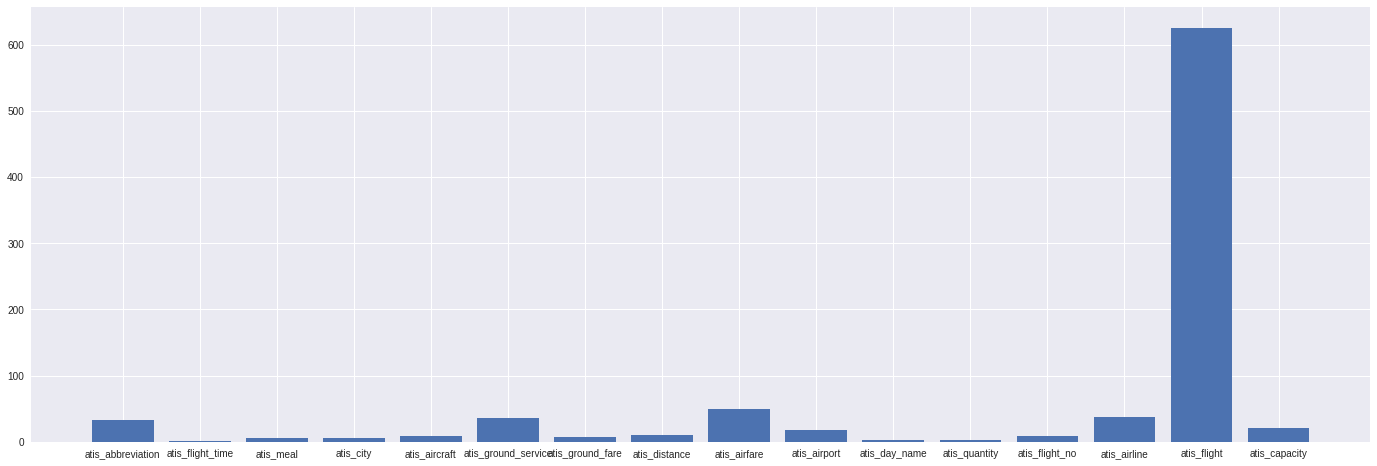

In [23]:
plt.figure(figsize=(24, 8))
plt.bar(list(test_intents_dup_free_freq.keys()),test_intents_dup_free_freq.values())
plt.show()

so we can see that unfortunately removing duplicates didn't have any noticable improvment on balancing the dataset.

In [24]:
from sklearn.utils import class_weight
# from keras.preprocessing.text import Tokenizer
# from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np


def identity_tokenizer(text):
    return text
# define Tokenizer with Vocab Size
# tokenizer = Tokenizer(num_words=len(train_vocabs))
# tokenizer.fit_on_texts(train_words)
vectorizer = TfidfVectorizer(tokenizer=identity_tokenizer,lowercase=False)
x_train = vectorizer.fit_transform(train_words)
x_test = vectorizer.fit_transform(test_words)
# x_train = tokenizer.texts_to_matrix(train_words, mode='tfidf')
# x_test = tokenizer.texts_to_matrix(test_words, mode='tfidf')

encoder = LabelBinarizer()
encoder.fit(train_intents)
y_train = encoder.transform(train_intents)
y_test = encoder.transform(test_intents)
print(encoder.classes_)
print(x_train.shape, y_train.shape)
#class_weight.compute_class_weight('balanced',np.unique(train_intents) ,train_intents)

['atis_abbreviation' 'atis_aircraft' 'atis_airfare' 'atis_airline'
 'atis_airport' 'atis_capacity' 'atis_city' 'atis_distance' 'atis_flight'
 'atis_flight_no' 'atis_flight_time' 'atis_ground_fare'
 'atis_ground_service' 'atis_meal' 'atis_quantity' 'atis_restriction']
(4977, 898) (4977, 16)


In [25]:
desired_count = 500
strategy = {0: desired_count, 15: desired_count}# setting atis_restriction and atis_abbreviation classes count just as an example

In [26]:
from imblearn.over_sampling import SMOTE, ADASYN
smote = ADASYN(sampling_strategy=strategy, n_neighbors=5) #SMOTE(sampling_strategy='minority', k_neighbors=5)
X_sm, y_sm = smote.fit_resample(x_train, y_train)
print(X_sm.shape, y_sm.shape)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


(5811, 898) (5811, 16)


In [27]:
y_temp = list(encoder.inverse_transform(y_sm))
temp_freq = dict()
for intent in y_temp:
    temp_freq[intent] = y_temp.count(intent)

for key in temp_freq:
    value = temp_freq[key]
    print('%s: %d (%.2f%%),' % (key, value, value / len(y_temp) * 100))


atis_flight: 3687 (63.45%),
atis_airfare: 424 (7.30%),
atis_airline: 159 (2.74%),
atis_ground_service: 256 (4.41%),
atis_quantity: 51 (0.88%),
atis_city: 19 (0.33%),
atis_abbreviation: 488 (8.40%),
atis_aircraft: 82 (1.41%),
atis_distance: 20 (0.34%),
atis_ground_fare: 18 (0.31%),
atis_capacity: 16 (0.28%),
atis_flight_time: 54 (0.93%),
atis_meal: 6 (0.10%),
atis_flight_no: 12 (0.21%),
atis_restriction: 499 (8.59%),
atis_airport: 20 (0.34%),


In [28]:
from textblob import TextBlob
from textblob.translate import NotTranslated
import random
sr = random.SystemRandom()

language = ["es", "de", "fr", "ar", "te", "hi", "ja", "fa", "sq", "bg", "nl", "gu", "ig", "kk", "mt", "ps"]

def data_augmentation(message, language, aug_range=1):
    augmented_messages = []
    if hasattr(message, "decode"):
        message = message.decode("utf-8")

    for j in range(0,aug_range) :
        new_message = ""
        text = TextBlob(message)
        try:
            text = text.translate(to=sr.choice(language))   ## Converting to random langauge for meaningful variation
            print('converted to random lang:',text)
            text = text.translate(to="en")
        except NotTranslated:
            pass
        augmented_messages.append(str(text))

    return augmented_messages

In [29]:
data_augmentation('i want to fly from baltimore to dallas round trip', language)

converted to random lang: Ich möchte von Baltimore nach Dallas hin und zurück fliegen


['I want to fly there and back from Baltimore to Dallas']

#TO-DO: code cleaning & augmenting data using langauge translation (above function) & word embeddings 
# also data undersampling by removing similar samples from major class (atis_flight)

In [ ]:
!pip install numpy requests nlpaug transformers

In [ ]:
import nlpaug.augmenter.word as naw
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('universal_tagset')
nltk.download('stopwords')
nltk.download('wordnet')
stop = nltk.corpus.stopwords.words('english')

In [121]:
# aug = naw.SynonymAug(aug_p=0.25,stopwords=stop,aug_src='wordnet',aug_max=3)
aug = naw.ContextualWordEmbsAug(model_path='bert-base-uncased',aug_p=0.2,stopwords=stop,aug_max=3)
aug.augment('i want to fly from baltimore to dallas round trip', n = 10)

['i want to fly from cincinnati to dallas : trip',
 'i played to win from baltimore to dallas round trip',
 'i want to leave from baltimore to dallas so trip',
 'i want to fly from baltimore to cincinnati road trip',
 'i decided to fly from baltimore to another round trip',
 'i want to fly from baltimore to massachusetts without trip',
 'i want to fly from baltimore to california i trip',
 'i seemed to fly from baltimore to amsterdam round trip',
 'i elected to fly from baltimore to dallas town trip',
 'i want to fly from jakarta to dallas street trip']

In [ ]:
!pip install textaugment

In [118]:
import gensim.downloader as api

# Download the models
fasttext_model300 = api.load('fasttext-wiki-news-subwords-300')
# word2vec_model300 = api.load('word2vec-google-news-300') # crash!
# glove_model300 = api.load('glove-wiki-gigaword-300')

# Get word embeddings
# word2vec_model300.most_similar('support')

[==================================================] 100.0% 958.5/958.4MB downloaded


In [119]:
from textaugment import Word2vec
t = Word2vec(model=fasttext_model300)
t.augment('i want to fly from baltimore to dallas round trip')

'i wantto to flys from baltimore to orlando round trip'

In [ ]:
# from gensim.matutils import softcossim
# from gensim import corpora

# sent_1 = 'Sachin is a cricket player and a opening batsman'.split()
# sent_2 = 'Dhoni is a cricket player too He is a batsman and keeper'.split()
# sent_3 = 'Anand is a chess player'.split()


# # Prepare a dictionary and a corpus.
# documents = train_words_dup_free #[sent_1, sent_2, sent_3]
# dictionary = corpora.Dictionary(documents)

# # Prepare the similarity matrix
# similarity_matrix = fasttext_model300.similarity_matrix(dictionary, tfidf=None, threshold=0.0, exponent=2.0, nonzero_limit=100)


# # Convert the sentences into bag-of-words vectors.
# sent_1 = dictionary.doc2bow(sent_1)
# sent_2 = dictionary.doc2bow(sent_2)
# sent_3 = dictionary.doc2bow(sent_3)

# # Compute soft cosine similarity
# print(softcossim(sent_1, sent_3, similarity_matrix))

In [41]:
train_sentences_dup_free = list()
for i in range(len(train_intents_dup_free)):
  if (train_intents_dup_free[i] == 'atis_flight'): 
    item = " ".join(train_words_dup_free[i])
    train_sentences_dup_free.append(item)

len(train_sentences_dup_free)

3443

In [ ]:
!pip install -U sentence-transformers

In [84]:
from sentence_transformers import SentenceTransformer, util
from sklearn.cluster import AgglomerativeClustering, KMeans
import numpy as np
import time  

corpus_sentences = train_sentences_dup_free
embedder = SentenceTransformer('paraphrase-mpnet-base-v2')

In [ ]:
# finding similar pairs

#Compute embeddings
corpus_embeddings = embedder.encode(sentences, convert_to_tensor=True)

#Compute cosine-similarities for each sentence with each other sentence
cosine_scores = util.pytorch_cos_sim(corpus_embeddings, corpus_embeddings)

#Find the pairs with the highest cosine similarity scores
pairs = []
for i in range(len(cosine_scores)-1):
    for j in range(i+1, len(cosine_scores)):
        pairs.append({'index': [i, j], 'score': cosine_scores[i][j]})

#Sort scores in decreasing order
pairs = sorted(pairs, key=lambda x: x['score'], reverse=True)

for pair in pairs[0:10]:
    i, j = pair['index']
    print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))

In [88]:
f = open('similar-pairs.txt', 'w')
for pair in pairs:
  i, j = pair['index']
  f.write("{} \t\t {} \t\t Score: {:.4f}\n".format(sentences[i], sentences[j], pair['score']))
  #print("{} \t\t {} \t\t Score: {:.4f}".format(sentences[i], sentences[j], pair['score']))
  if (pair['score'] < 0.8): break
f.close()

In [102]:
# Corpus with example sentences
corpus_sentences = train_sentences_dup_free
corpus_embeddings = embedder.encode(corpus_sentences)

# Normalize the embeddings to unit length
corpus_embeddings = corpus_embeddings /  np.linalg.norm(corpus_embeddings, axis=1, keepdims=True)

In [108]:
# K-means

num_clusters = 5
clustering_model = KMeans(n_clusters=num_clusters)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = [[] for i in range(num_clusters)]
for sentence_id, cluster_id in enumerate(cluster_assignment):
    clustered_sentences[cluster_id].append(corpus[sentence_id])

In [109]:
f = open('Clusters-k-means.txt', 'w')
for i, cluster in enumerate(clustered_sentences):
    f.write("Cluster %d, #%d Elements :\n" % (i+1, len(cluster)) + str(cluster) + "\n\n\n")
    # print("Cluster ", i+1)
    # print(cluster)
    # print("")
f.close()

In [105]:
# Agglomerative Clustering

clustering_model = AgglomerativeClustering(n_clusters=None, affinity='cosine', linkage='average', distance_threshold=0.5)
clustering_model.fit(corpus_embeddings)
cluster_assignment = clustering_model.labels_

clustered_sentences = {}
for sentence_id, cluster_id in enumerate(cluster_assignment):
    if cluster_id not in clustered_sentences:
        clustered_sentences[cluster_id] = []

    clustered_sentences[cluster_id].append(corpus[sentence_id])

len(clustered_sentences)

22

In [107]:
f = open('Clusters-Agglomerative.txt', 'w')
for i, cluster in clustered_sentences.items():
    f.write("Cluster %d, #%d Elements :\n" % (i+1,len(cluster)) + str(cluster) + "\n\n\n")
    # print("Cluster ", i+1)
    # print(cluster)
    # print("")
f.close()

In [112]:
# Fast Clustering

corpus_sentences = train_sentences_dup_free
print("Encode the corpus. This might take a while")
corpus_embeddings = embedder.encode(corpus_sentences, batch_size=64, show_progress_bar=True, convert_to_tensor=True)

print("Start clustering")
start_time = time.time()

#Two parameters to tune:
#min_cluster_size: Only consider cluster that have at least 25 elements
#threshold: Consider sentence pairs with a cosine-similarity larger than threshold as similar
clusters = util.community_detection(corpus_embeddings, min_community_size=1, threshold=0.75)

print("Clustering done after {:.2f} sec".format(time.time() - start_time))

Encode the corpus. This might take a while


Batches:   0%|          | 0/54 [00:00<?, ?it/s]

Start clustering
Clustering done after 0.98 sec


In [117]:
f = open('Clusters-fast.txt', 'w')
#Print for all clusters the top 3 and bottom 3 elements
for i, cluster in enumerate(clusters):
    #print("\nCluster {}, #{} Elements ".format(i+1, len(cluster)))
    data = [corpus_sentences[sentence_id] for sentence_id in cluster]
    f.write("Cluster {}, #{} Elements \n".format(i+1, len(cluster)) + str(data) + "\n\n\n")

    # for sentence_id in cluster[0:3]:
    #     #print("\t", corpus_sentences[sentence_id])
    #     f.write("\t" + corpus_sentences[sentence_id])
    # #print("\t", "...")
    # f.write("\t ...")
    # for sentence_id in cluster[-3:]:
    #     #print("\t", corpus_sentences[sentence_id])
    #     f.write("\t" + corpus_sentences[sentence_id])
    
f.close()